In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
player_name = "Zach Edey"
year = 2025
stat = 'DRB'
last_games_count = 20
prop_line = 8

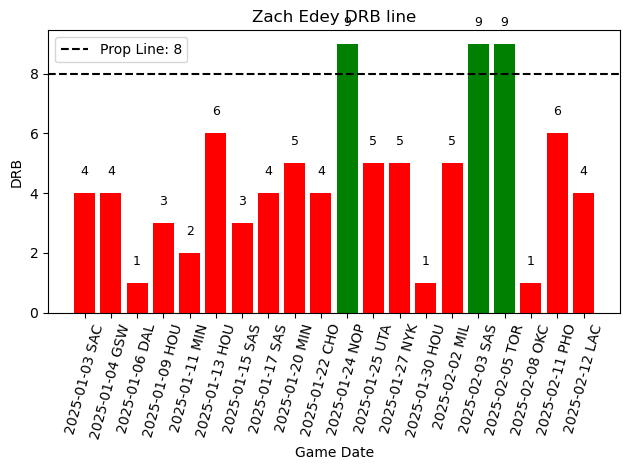

In [27]:
# read to get df
DF = pd.read_html(f"TheProject/Data/DataFrames/{player_name}_{year}DataFrame.html")
df = DF[0]

# drop games not played
df = df[df['G'] != 'DNP']
df = df.reset_index(drop=True)

# drop stats that are unused in props
df = df.drop(columns = ['Location','Tm','WLSpread','GS','MP','PF','GmSc', '+/-','FT%','3P%','FG%','Age','G'])

# add columns
df[['PTS', 'TRB', 'AST', 'ORB', 'DRB', 'STL', 'BLK', 'TOV', 'FT', '3P', 'FG', 'FGA', '3PA']] = df[['PTS', 'TRB', 'AST', 'ORB', 'DRB', 'STL', 'BLK', 'TOV', 'FT', '3P', 'FG', 'FGA', '3PA']].apply(pd.to_numeric, errors='coerce')
df['PRA'] = df[['PTS', 'TRB', 'AST']].sum(axis=1) # PRA (points + rebounds, assists)
df['PR'] = df[['PTS', 'TRB']].sum(axis=1) # PR
df['PA'] = df[['PTS', 'AST']].sum(axis=1) # PA
df['RA'] = df[['TRB', 'AST']].sum(axis=1) # RA

# graphing
df_last = df.tail(last_games_count)
colors = ["green" if used_stat > prop_line else "red" if used_stat < prop_line else "grey" for used_stat in df_last[stat]] # coloring the bars based on prop_line
# graph
bars = plt.bar(df_last['Date'] + ' ' + df_last['Opp'], df_last[stat], color=colors)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{int(yval)}', ha='center', va='bottom', fontsize=9)

# Prop line
plt.axhline(prop_line, color='black', linestyle='--', label=f'Prop Line: {prop_line}')

# Labels and title
plt.xlabel('Game Date')
plt.ylabel(stat)
plt.title(f'{player_name} {stat} line')
plt.xticks(rotation=75)
plt.legend()
plt.tight_layout()
plt.show()